# Decision Tree Assignment

## Importing Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

## Importing Dataset

In [5]:
Company = pd.read_csv('Company_Data.csv')

## Data Understanding

In [6]:
Company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
Company.shape

(400, 11)

In [8]:
Company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

## Applying Label Encoding to a categorical data

In [9]:
LabelEncoder = preprocessing.LabelEncoder()
Company['ShelveLoc'] = LabelEncoder.fit_transform(Company['ShelveLoc'])
Company['Urban'] = LabelEncoder.fit_transform(Company['Urban'])
Company['US'] = LabelEncoder.fit_transform(Company['US'])

In [10]:
Company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [11]:
Company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
Urban            int32
US               int32
dtype: object

In [12]:
Company['Sales'] = Company['Sales'].astype(int)

In [13]:
Company.dtypes

Sales          int32
CompPrice      int64
Income         int64
Advertising    int64
Population     int64
Price          int64
ShelveLoc      int32
Age            int64
Education      int64
Urban          int32
US             int32
dtype: object

## Splitting a data

In [14]:
x=Company.iloc[:,1:]
y=Company['Sales']

In [15]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [16]:
y

0       9
1      11
2      10
3       7
4       4
       ..
395    12
396     6
397     7
398     5
399     9
Name: Sales, Length: 400, dtype: int32

## Splitting dataset into training and testing data

In [17]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [18]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
85,125,103,0,304,112,2,49,13,0,0
69,127,59,0,339,99,2,65,12,1,0
203,131,82,0,132,157,0,25,14,1,0
379,125,111,0,404,107,0,54,15,1,0
261,121,42,4,188,118,2,54,15,1,1
...,...,...,...,...,...,...,...,...,...,...
306,131,32,1,85,133,2,48,12,1,1
165,147,58,7,100,191,0,27,15,1,1
7,136,81,15,425,120,1,67,10,1,1
219,116,79,19,359,116,1,58,17,1,1


In [19]:
y_train

85      8
69      7
203     2
379     5
261     5
       ..
306     4
165     0
7      11
219    10
326     4
Name: Sales, Length: 320, dtype: int32

In [20]:
x_train.shape,y_train.shape

((320, 10), (320,))

In [21]:
x_test.shape,y_test.shape

((80, 10), (80,))

# Building Decision Tree Classifier using Entropy Criteria

In [22]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

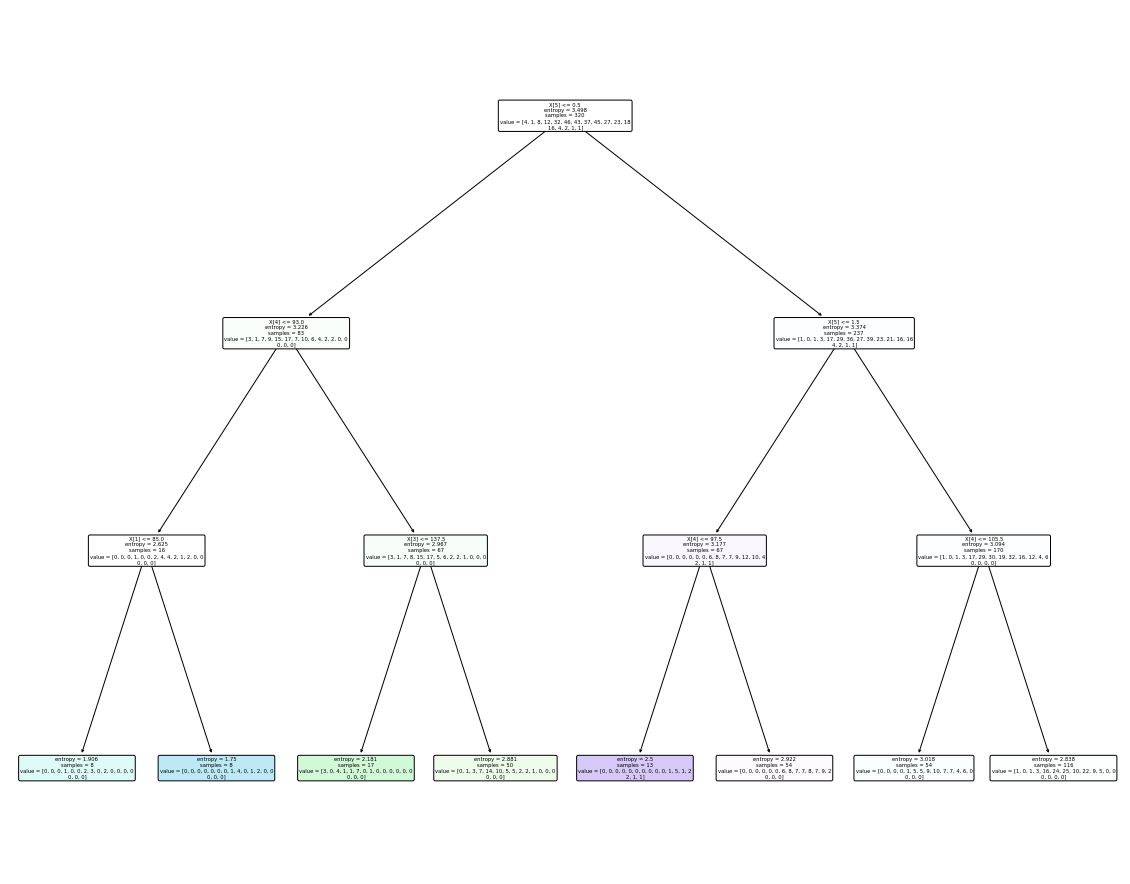

In [49]:
plt.figure(figsize=(20,16))
plot_tree(model,rounded=True,filled=True)
plt.show()

In [50]:
# For training data
y_train_pred = model.predict(x_train)

In [51]:
# For testing data
y_test_pred = model.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score

## For training data

In [53]:
accuracy_score(y_train,y_train_pred)

0.240625

In [54]:
print(confusion_matrix(y_train,y_train_pred))

[[ 0  0  0  0  0  3  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  4  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  1  3  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 14  1 16  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10  7 24  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  0 25  2  5  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  5  1 10  3 10  0  0  0  8  0  0  0  0]
 [ 0  0  0  0  2  0 22  0 14  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  2  0  9  2  7  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  1  0  5  0  8  0  0  1  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  5  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  1  9  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]]


In [57]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        12
           4       0.28      0.44      0.34        32
           5       0.41      0.15      0.22        46
           6       0.22      0.58      0.31        43
           7       0.38      0.08      0.13        37
           8       0.23      0.31      0.26        45
           9       0.00      0.00      0.00        27
          10       0.00      0.00      0.00        23
          11       0.38      0.28      0.32        18
          12       0.17      0.56      0.26        16
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1

    accuracy              

# For testing data

In [56]:
accuracy_score(y_test,y_test_pred)

0.1625

In [59]:
print(confusion_matrix(y_test,y_test_pred))

[[0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 3 1 0 0 0 0 1 0]
 [0 0 0 0 2 0 6 0 0 0 0 0 1 0]
 [0 0 0 0 2 0 3 0 2 0 0 0 0 0]
 [0 0 0 0 1 1 5 2 1 0 0 0 1 0]
 [0 0 0 0 1 0 7 0 5 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 4 0 0 0 1 0]
 [0 0 0 0 0 0 2 0 2 0 0 0 4 0]
 [0 0 0 0 0 0 1 0 3 0 0 2 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 2 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 1 1 0]]


In [58]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         7
           4       0.22      0.22      0.22         9
           5       0.00      0.00      0.00         7
           6       0.17      0.45      0.24        11
           7       0.00      0.00      0.00        15
           8       0.21      0.80      0.33         5
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         7
          11       0.40      0.50      0.44         4
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         3

    accuracy                           0.16        80
   macro avg       0.07      0.14      0.09        80
weighted avg       0.08      0.16      0.10        80



# Building Decision Tree Classifier (CART) using Gini Criteria

In [30]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [35]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [36]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

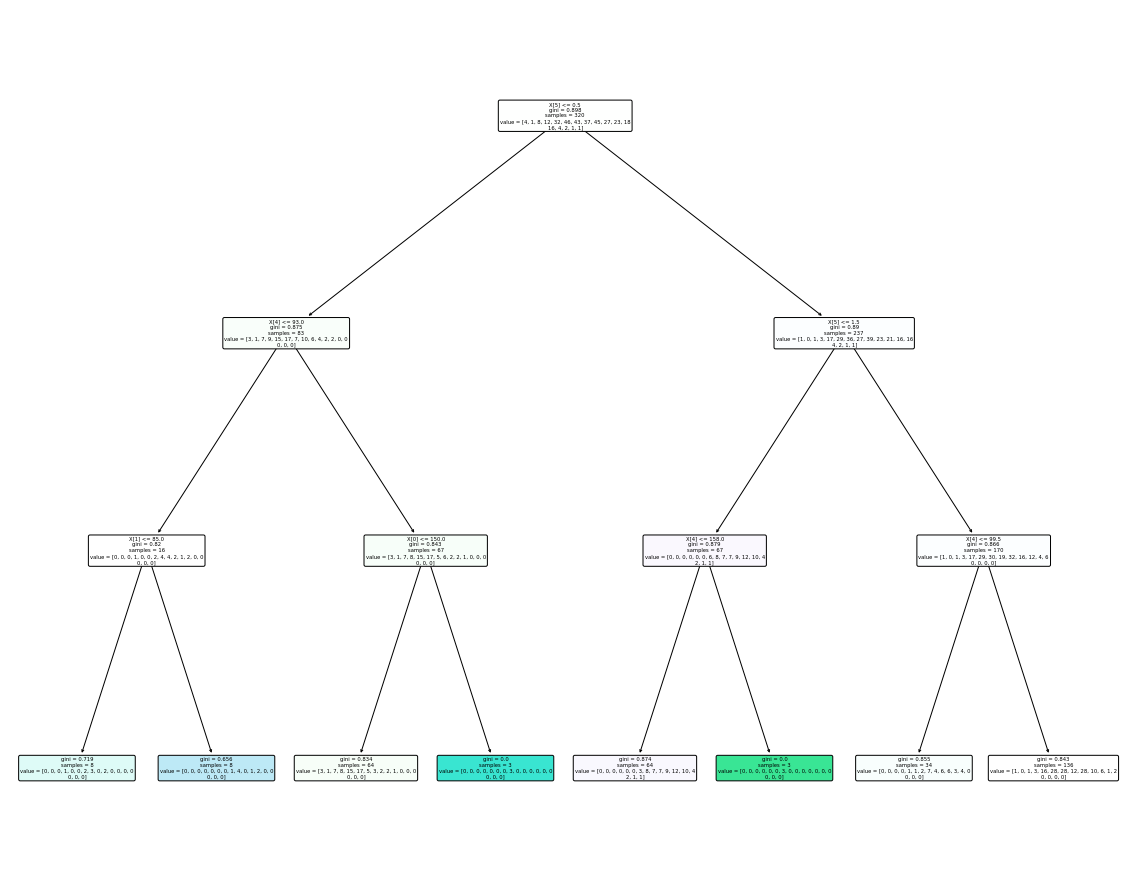

In [38]:
plt.figure(figsize=(20,16))
plot_tree(model_gini,rounded=True,filled=True)
plt.show()

In [39]:
# For training data
y_train_pred = model_gini.predict(x_train)

In [40]:
# For testing data
y_test_pred = model_gini.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score

# For training data

In [43]:
accuracy_score(y_train,y_train_pred)

0.240625

In [45]:
print(confusion_matrix(y_train,y_train_pred))

[[ 0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 31  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 45  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 33  3  4  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0 15  0 13  1  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  4  4  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0 12  0  8  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  6  1  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  3  2  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  4  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]]


In [44]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        32
           5       0.23      0.98      0.37        46
           6       1.00      0.07      0.13        43
           7       0.29      0.35      0.32        37
           8       0.50      0.09      0.15        45
           9       0.00      0.00      0.00        27
          10       0.00      0.00      0.00        23
          11       0.19      0.67      0.29        18
          12       0.00      0.00      0.00        16
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1

    accuracy              

# For testing data

In [46]:
accuracy_score(y_test,y_test_pred)

0.175

In [48]:
print(confusion_matrix(y_test,y_test_pred))

[[0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 5 1 1 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 1 0]
 [0 0 0 0 0 6 0 1 0 0 0 0 0]
 [0 0 0 0 0 6 0 4 0 0 0 1 0]
 [0 0 0 0 0 8 0 5 0 0 0 2 0]
 [0 0 0 0 0 1 0 3 0 0 0 1 0]
 [0 0 0 0 0 2 0 2 0 0 0 4 0]
 [0 0 0 0 0 2 0 2 0 0 0 3 0]
 [0 0 0 0 0 0 0 1 0 0 0 3 0]
 [0 0 0 0 0 0 0 1 0 0 0 2 0]]


In [47]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         9
           5       0.14      0.86      0.24         7
           6       0.00      0.00      0.00        11
           7       0.25      0.33      0.29        15
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         7
          11       0.18      0.75      0.29         4
          13       0.00      0.00      0.00         3

    accuracy                           0.17        80
   macro avg       0.04      0.15      0.06        80
weighted avg       0.07      0.17      0.09        80

